In [606]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'test.csv', 'submission_file.csv']


In [607]:
#To visualize the whole grid
pd.options.display.max_columns = 999
#Kaggle divides the dataset already into Train and Test data
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
submission = pd.read_csv("../input/submission_file.csv")
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [608]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [609]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [610]:
# Check for duplicates
idsUnique = len(set(train.User_ID))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 544177 duplicate IDs for 550068 total entries


In [611]:
# To know features with numeric values
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
dtype: object

In [612]:
# Let's plot the distribution of each attribute and see what we can find

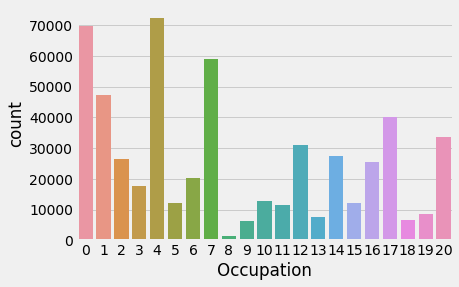

In [613]:
# Plotting 'Occupation' attribute
sns.countplot(train.Occupation)

In [614]:
# Category 8 shows least purchase count while categories 0,4,7 show overwhelming purchases

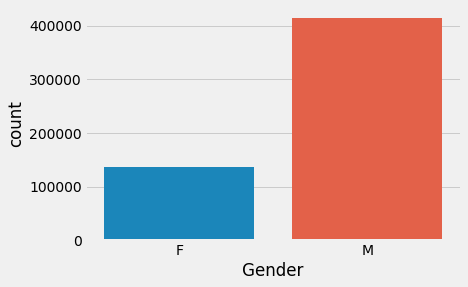

In [615]:
# Plotting 'Gender' variable
sns.countplot(train.Gender)

In [616]:
# Most buyers are male which is surprising. Why should girls have all the fun? ;)

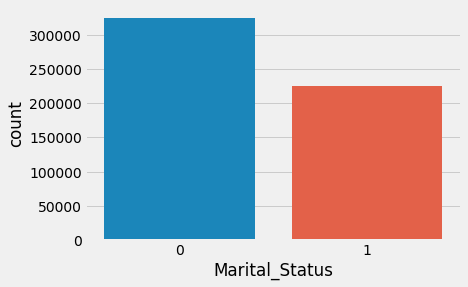

In [617]:
# Plotting 'Marital_Status' attribute
sns.countplot(train.Marital_Status)

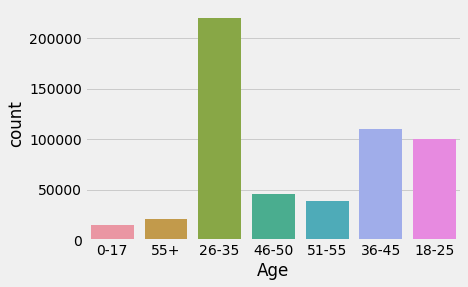

In [618]:
# Plotting 'Age' variable
sns.countplot(train.Age)

In [619]:
# 26-35 age group shows maximum interest in shopping.

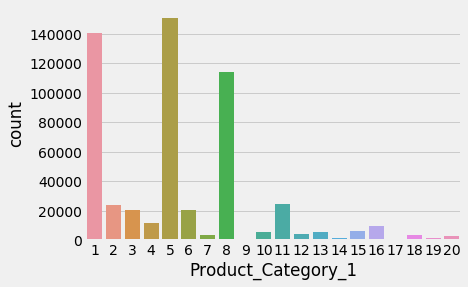

In [620]:
# Plotting Product_Category_1 'attribute'
sns.countplot(train.Product_Category_1)

In [621]:
# Product categories 1,5,8 show overwhelming sales. They might be day-to-day essentials.

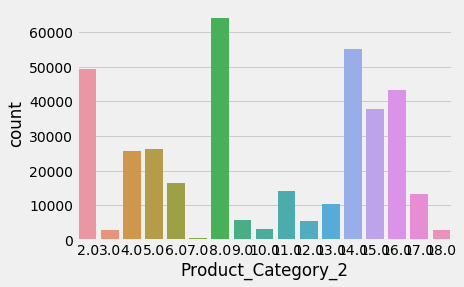

In [622]:
# Plotting Product_Category_2 'attribute'
sns.countplot(train.Product_Category_2)

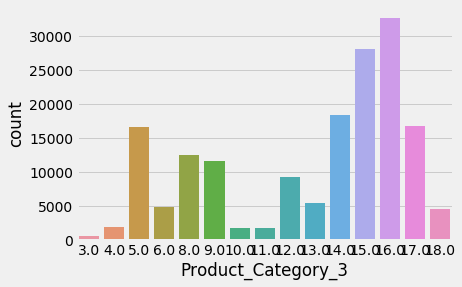

In [623]:
# Plotting Product_Category_3 'attribute'
sns.countplot(train.Product_Category_3)

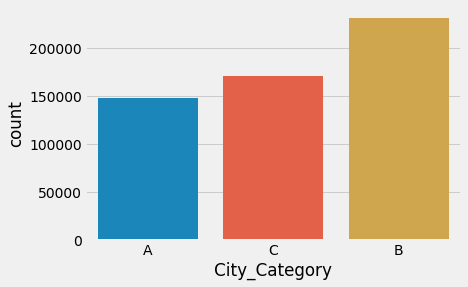

In [624]:
# Plotting 'City_Category' variable
sns.countplot(train.City_Category)

In [ ]:
# Middle tier cities show maimum sales (assuming A to be max and C to be min tier cities or vice versa)

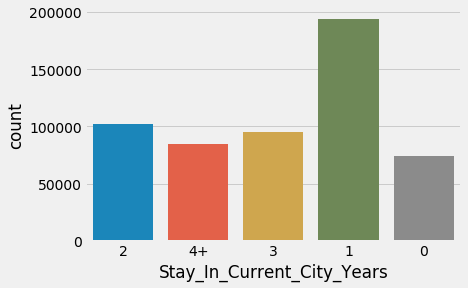

In [625]:
# Plotting 'Stay_In_Current_City_Years' variable
sns.countplot(train.Stay_In_Current_City_Years)

In [ ]:
# People new to any city make good amount of purchase. This could be attributed to furnitures, 
# electrical or electronics appliances that people need when they relocate.

In [626]:
corr = numeric_features.corr()
print(corr)

                     User_ID  Occupation  Marital_Status  Product_Category_1  \
User_ID             1.000000   -0.023971        0.020443            0.003825   
Occupation         -0.023971    1.000000        0.024280           -0.007618   
Marital_Status      0.020443    0.024280        1.000000            0.019888   
Product_Category_1  0.003825   -0.007618        0.019888            1.000000   
Product_Category_2  0.001529   -0.000384        0.015138            0.540583   
Product_Category_3  0.003419    0.013263        0.019473            0.229678   
Purchase            0.004716    0.020833       -0.000463           -0.343703   

                    Product_Category_2  Product_Category_3  Purchase  
User_ID                       0.001529            0.003419  0.004716  
Occupation                   -0.000384            0.013263  0.020833  
Marital_Status                0.015138            0.019473 -0.000463  
Product_Category_1            0.540583            0.229678 -0.343703  
Prod

In [627]:
print (corr['Purchase'].sort_values(ascending=False)[-10:])

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64


In [ ]:
# No single attribute has a high impact on 'Purchase' , since the highest correlation is give by 
# 'Occupation' with 0.0208. On the other hand, 'Product_Category_1' has a negative correlation with 
# our target with the value -0.3437.

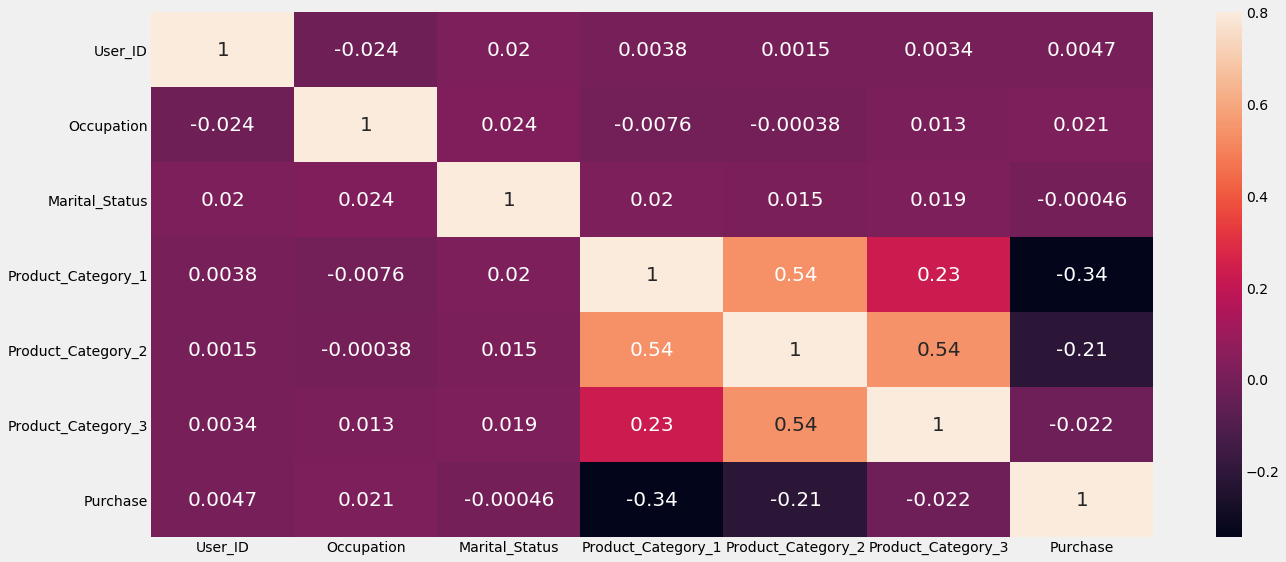

In [628]:
#correlation matrix
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 20}, annot=True);

In [629]:
# Attributes appear to be linearly independent which is a good thing, although there is some 
# correlation among the product categories. This could be attributed to the fact that a single 
# item can belong to multiple categories like a computer mouse can belong to categories computer accessories
# as well as gaming accessories.


**Bivariate Analysis**

Analyze the relation of 'Purchase' variable with ddecision attributes.

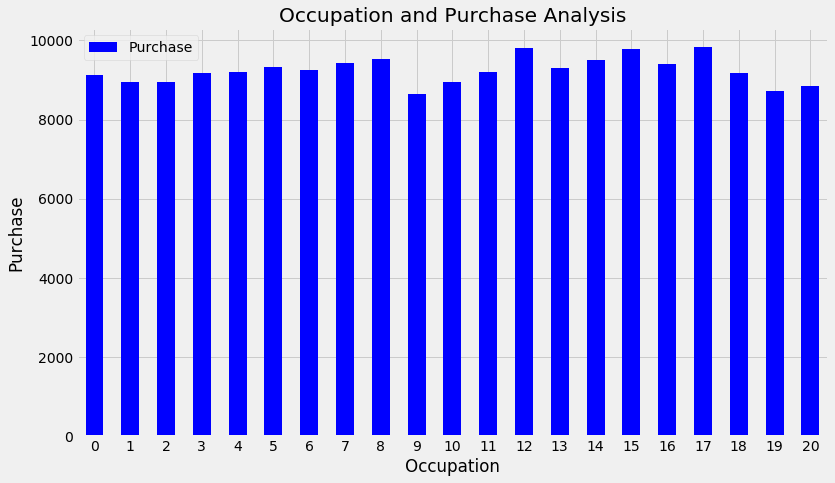

In [630]:
plot_pivot = \
train.pivot_table(index='Occupation', values="Purchase", aggfunc=np.mean)
plot_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Appart from categories 9,19 and 20 , all categories show very similar purchase trends. 
# This could be attributed to the fact that their are products targeted to audience depending upon
# financial constraints. 


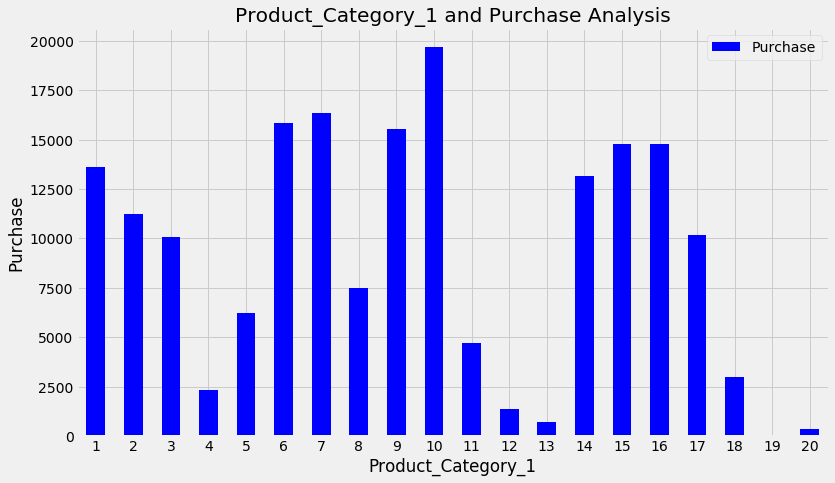

In [631]:
plot_pivot = \
train.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.mean)
plot_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")
plt.title("Product_Category_1 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Products of categories 19 and 20 show almost negligible average sales

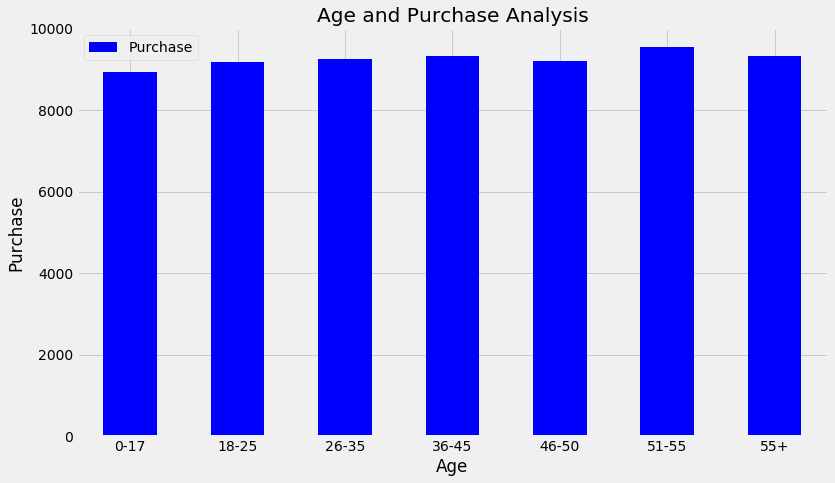

In [632]:
plot_pivot = \
train.pivot_table(index='Age', values="Purchase", aggfunc=np.mean)
plot_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Although age group 26-35 showed max no of buyers, it is interesting to view that the average 
# purchase amount across all age groups is nearly the same. With age people tend to spend differently

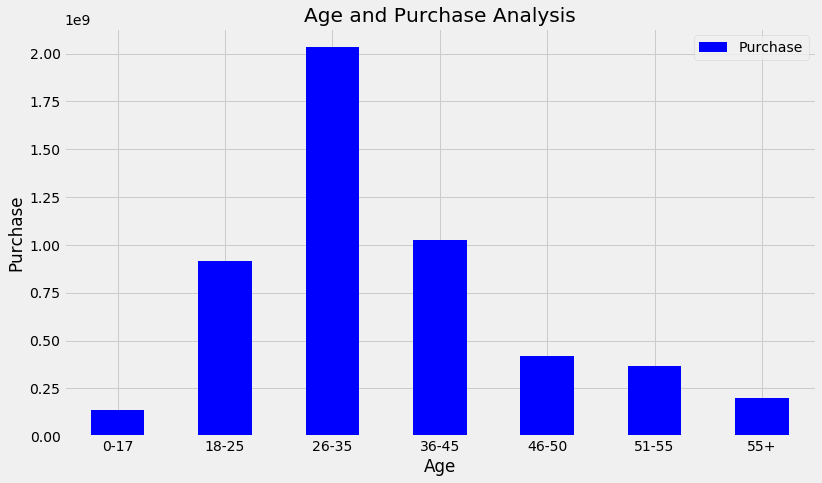

In [633]:
plot_pivot = \
train.pivot_table(index='Age', values="Purchase", aggfunc=np.sum)
plot_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

In [ ]:
# But the total purchase figure concorts with our initial observation about purchasing frequency
# of the young generation. "Plots don't lie!"

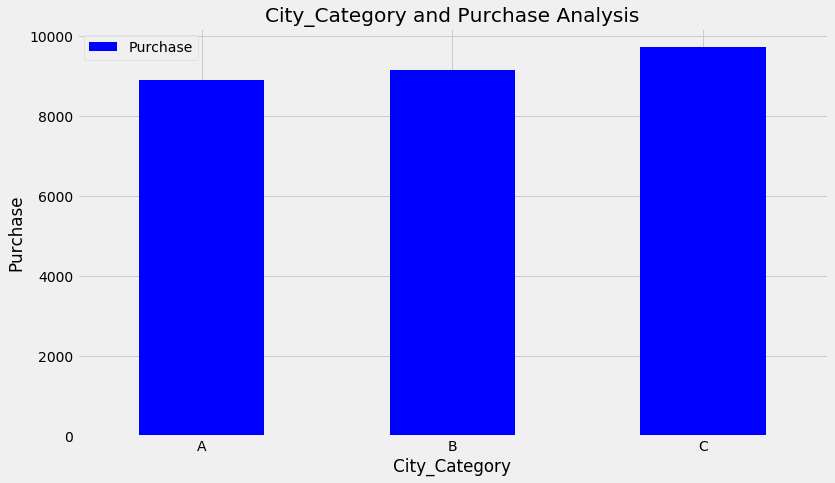

In [634]:
plot_pivot = \
train.pivot_table(index='City_Category', values="Purchase", aggfunc=np.mean)
plot_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("City_Category")
plt.ylabel("Purchase")
plt.title("City_Category and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Although the middle tier cities registered the maximum purchases, they did not contribute as much
# as the highest tier city(assuming C to be tier 1)

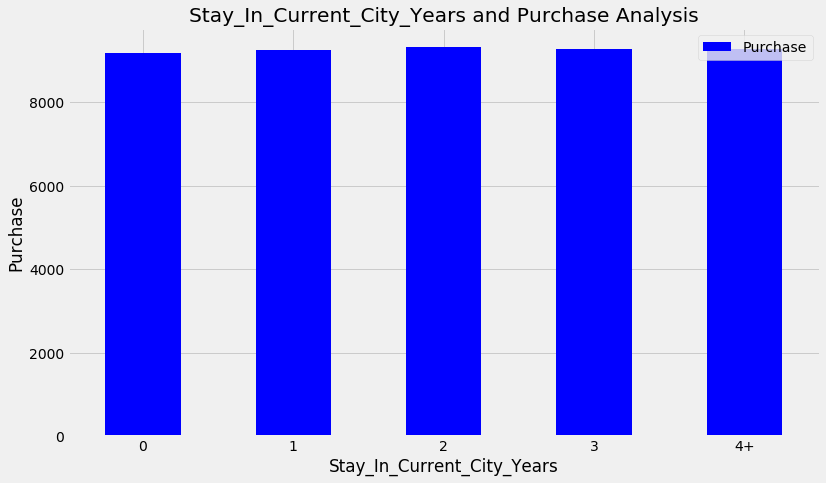

In [635]:
plot_pivot = \
train.pivot_table(index='Stay_In_Current_City_Years', values="Purchase", aggfunc=np.mean)
plot_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Stay_In_Current_City_Years")
plt.ylabel("Purchase")
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Although people new to the city make the most purchases, over time they tend to spend more luxuriously
# in terms of quality than quantity

In [636]:
# Although these are numeric features, most of them represent categories. User_ID represents unique
# user id while purchase is our target label. Hence all the attributes are basically categorical 
# attributes
cats = [ "Gender", "Age", "Occupation", "City_Category", "Stay_In_Current_City_Years",
                       "Marital_Status", "Product_Category_1", "Product_Category_2", "Product_Category_3"]

In [637]:
data=pd.concat([train,test], ignore_index = True, sort = False)

In [638]:
print(train.shape, test.shape, data.shape)

(550068, 12) (233599, 11) (783667, 12)


In [639]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [ ]:
# Only product categories 2 and 3 have missing values while the missing values in purchase are the ones
# to be predicted which is fine as a poduct may not belong to multiple categories. We could fill these 
# values with 0

In [640]:
data["Product_Category_2"]= data["Product_Category_2"].fillna(0).astype("float")
data["Product_Category_3"]= data["Product_Category_3"].fillna(0).astype("float")
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

In [ ]:
# We have done EDA based on average purchase figures.  So let's see the average sale figures of each
# poduct

In [641]:
product_id_res = train.groupby(["Product_ID"])["Purchase"].mean()
avg_cost = train["Purchase"].mean()
print(avg_cost)
print(product_id_res)

9263.968712959126
Product_ID
P00000142    11143.642361
P00000242    10551.851064
P00000342     5313.422131
P00000442     4795.358696
P00000542     5417.530201
P00000642    14913.238281
P00000742     6031.390041
P00000842    10008.722222
P00000942    10565.909091
P00001042    13762.186879
P00001142     6685.000000
P00001242     4281.940000
P00001342     8579.629032
P00001442     7350.717647
P00001542     9279.898551
P00001642     7554.677966
P00001742     8000.459870
P00001842    14420.315789
P00001942     4315.071090
P00002042     9567.000000
P00002142    14182.530612
P00002242    13548.919192
P00002342    11834.925373
P00002442     6369.754545
P00002542     7315.311688
P00002642     6915.000000
P00002742     5965.500000
P00002842    14896.595238
P00002942    13137.437500
P00003042     7529.648649
                 ...     
P0096942      9253.363636
P0097042     15252.459770
P0097142      1378.356557
P0097242     15947.346491
P0097342     10465.480769
P0097442      6318.833333
P0097542 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Sales Distribution')

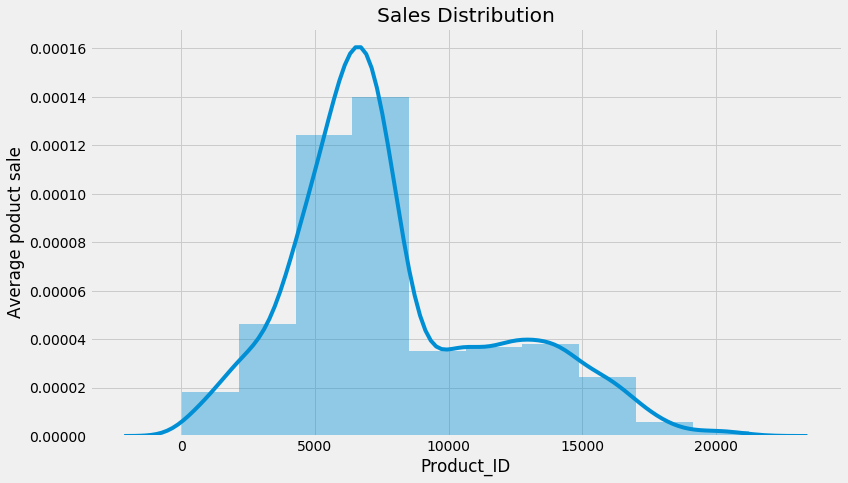

In [642]:
# plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(product_id_res.values, bins = 10)
plt.xlabel("Product_ID")
plt.ylabel("Average poduct sale")
plt.title("Sales Distribution")

In [643]:
def get_purchase_mean(product_id, product_category=None, key=None):
    key_pair = str(product_id)
    key_pair_pid = str(product_id) + str(product_category)
    if key == "1":
        if key_pair_pid in product_category_1_res:
            return product_category_1_res[key_pair_pid]
    elif key == "2":
        if key_pair_pid in product_category_2_res:
            return product_category_2_res[key_pair_pid]
    elif key == "3":
        if key_pair_pid in product_category_3_res:
            return product_category_3_res[key_pair_pid]
    if key_pair in product_id_res:
        return product_id_res[key_pair]
    return avg_cost

In [644]:
data["purchase_avg_by_p_id"] = map(lambda product_id: get_purchase_mean(product_id), data["Product_ID"])

In [645]:
data["purchase_avg_by_p_id"]

0         <map object at 0x7f16eb729780>
1         <map object at 0x7f16eb729780>
2         <map object at 0x7f16eb729780>
3         <map object at 0x7f16eb729780>
4         <map object at 0x7f16eb729780>
5         <map object at 0x7f16eb729780>
6         <map object at 0x7f16eb729780>
7         <map object at 0x7f16eb729780>
8         <map object at 0x7f16eb729780>
9         <map object at 0x7f16eb729780>
10        <map object at 0x7f16eb729780>
11        <map object at 0x7f16eb729780>
12        <map object at 0x7f16eb729780>
13        <map object at 0x7f16eb729780>
14        <map object at 0x7f16eb729780>
15        <map object at 0x7f16eb729780>
16        <map object at 0x7f16eb729780>
17        <map object at 0x7f16eb729780>
18        <map object at 0x7f16eb729780>
19        <map object at 0x7f16eb729780>
20        <map object at 0x7f16eb729780>
21        <map object at 0x7f16eb729780>
22        <map object at 0x7f16eb729780>
23        <map object at 0x7f16eb729780>
24        <map o

In [ ]:
# Similarly let's see the average purchase figures of each user

In [646]:
user_purchase_power = train.groupby("User_ID")["Purchase"].sum()
print(avg_cost)
print(user_purchase_power)

9263.968712959126
User_ID
1000001     334093
1000002     810472
1000003     341635
1000004     206468
1000005     821001
1000006     379930
1000007     234668
1000008     796593
1000009     594099
1000010    2169510
1000011     557023
1000012     120801
1000013     713927
1000014     127629
1000015    1047728
1000016     150490
1000017    1425995
1000018    1979047
1000019    1458069
1000020     185747
1000021     127099
1000022    1279914
1000023    1670998
1000024     720899
1000025     534706
1000026    1606174
1000027     448934
1000028     516560
1000029     696201
1000030     261584
            ...   
1006011    1198714
1006012     127920
1006013     622847
1006014     528238
1006015     255812
1006016    3770970
1006017     160230
1006018     975585
1006019     604563
1006020     374475
1006021     709448
1006022     278257
1006023    1222210
1006024     827570
1006025    1040257
1006026     490768
1006027     265201
1006028     362972
1006029     157436
1006030     737361
10060

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Purchase power Distribution')

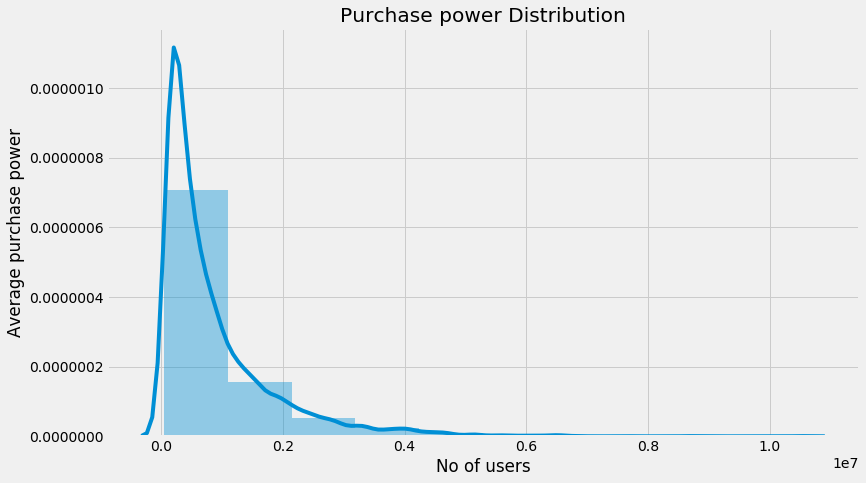

In [647]:
# plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(user_purchase_power.values, bins = 10)
plt.xlabel("No of users")
plt.ylabel("Average purchase power")
plt.title("Purchase power Distribution")

In [648]:
user_id_to_category_map = {}
values = user_purchase_power.iteritems()
for key, val in values:
    if val <= 146570.0:
        user_id_to_category_map[key] = 1
    elif val <= 205272.0:
        user_id_to_category_map[key] = 2
    elif val <= 279288.0:
        user_id_to_category_map[key] = 3
    elif val <= 383455.0:
        user_id_to_category_map[key] = 4
    elif val <= 521213.0:
        user_id_to_category_map[key] = 5
    elif val <= 698842.0:
        user_id_to_category_map[key] = 6
    elif val <= 942900.0:
        user_id_to_category_map[key] = 7
    elif val <= 1355245.0:
        user_id_to_category_map[key] = 8
    elif val <= 2069404.0:
        user_id_to_category_map[key] = 9
    else:
        user_id_to_category_map[key] = 10

In [649]:
def get_customer_category(user_id):
    if user_id in user_id_to_category_map:
        return user_id_to_category_map[user_id]
    return 5

In [650]:
data["user_category"] = map(lambda user_id: get_customer_category(user_id), data["User_ID"])

In [651]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 14 columns):
User_ID                       783667 non-null int64
Product_ID                    783667 non-null object
Gender                        783667 non-null object
Age                           783667 non-null object
Occupation                    783667 non-null int64
City_Category                 783667 non-null object
Stay_In_Current_City_Years    783667 non-null object
Marital_Status                783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Purchase                      550068 non-null float64
purchase_avg_by_p_id          783667 non-null object
user_category                 783667 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 83.7+ MB


In [652]:
data.drop(['user_category','purchase_avg_by_p_id'],axis=1,inplace=True)

In [653]:
from sklearn import preprocessing

In [654]:
for var in cats:
    lb = preprocessing.LabelEncoder()
    lb.fit(data[var].astype('str'))
    data[var]=lb.transform(data[var].astype('str'))

Preprocessing

In [655]:
target = data.Purchase	
input = data.drop(["Purchase"], axis=1)	
prod_id = input[550068:783667].Product_ID	
user_id = input[550068:783667].User_ID	
submission.Product_ID = np.asarray(prod_id)	
submission.User_ID = np.asarray(user_id)	
input.drop(['User_ID','Product_ID'],axis=1,inplace=True)	
train_X = input[0:550068]	
test_X = input[550068:783667]

In [656]:
train_Y = target[0:550068]	
test_Y = target[550068:783667]	
train_X=np.array(train_X)	
train_Y=np.array(train_Y)	
X_train, X_test, Y_train, Y_test = train_test_split(train_X, train_Y, test_size=0.3)	
Y_train = Y_train.reshape(-1,1)

Creating Models

In [657]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pickle

Linear Regression

In [658]:
lr=LinearRegression()
model=lr.fit(X_train,Y_train)
filename = 'finalized_model_lr.sav'	
pickle.dump(model, open(filename, 'wb'))	
model.coef_	
scores = cross_val_score(model, X_train, Y_train, cv=6)	
print ("Cross-validated scores:", scores)	
predictions = cross_val_predict(model, X_test, Y_test, cv=6)	
accuracy = metrics.r2_score(Y_test, predictions)	
print ("Cross-Predicted Accuracy:", accuracy)	
predictions = model.predict(test_X)	
a = []	
# print()	
for i in range(0,len(predictions)):	
               a.append(predictions[i][0])	
submission.Purchase = np.asarray(a)	
submission.to_csv("submit_lr.csv", index=False)

Cross-validated scores: [0.21336214 0.2140055  0.21830391 0.21592264 0.21548467 0.21769525]
Cross-Predicted Accuracy: 0.21514673011223828


In [659]:
loaded_model = pickle.load(open(filename, 'rb'))	
result = loaded_model.score(X_test, Y_test)	
print(result)

0.2151625979812818


**Lasso Regression**

In [660]:
lasso = linear_model.Lasso(alpha=0.1)	
model=lasso.fit(X_train,Y_train)	
filename = 'finalized_model_lasso.sav'	
pickle.dump(model, open(filename, 'wb'))	
model.coef_	
scores = cross_val_score(model, X_train, Y_train, cv=6)	
print ("Cross-validated scores:", scores)	
predictions = cross_val_predict(model, X_test, Y_test, cv=6)	
accuracy = metrics.r2_score(Y_test, predictions)	
print ("Cross-Predicted Accuracy:", accuracy)	
predictions = model.predict(test_X)	
a = []	
# print()	
# for i in range(0,len(predictions)):	
#                a.append(predictions[i][0])	
submission.Purchase = predictions	
submission.to_csv("submit_lasso.csv", index=False)

Cross-validated scores: [0.21336205 0.21400481 0.21830435 0.21592337 0.21548549 0.21769485]
Cross-Predicted Accuracy: 0.2151467220024853


In [661]:
loaded_model = pickle.load(open(filename, 'rb'))	
result = loaded_model.score(X_test, Y_test)	
print(result)

0.2151620854153086


**DecisionTree Regressor**

In [662]:
regressor = DecisionTreeRegressor(random_state=0)	
model=regressor.fit(X_train,Y_train)	
filename = 'finalized_model_dt.sav'	
pickle.dump(model, open(filename, 'wb'))	
scores = cross_val_score(model, X_train, Y_train, cv=6)	
print ("Cross-validated scores:", scores)	
predictions = cross_val_predict(model, X_test, Y_test, cv=6)	
accuracy = metrics.r2_score(Y_test, predictions)	
print ("Cross-Predicted Accuracy:", accuracy)	
predictions = model.predict(test_X)	
a = []	
# print()	
# for i in range(0,len(predictions)):	
#                a.append(predictions[i][0])	
submission.Purchase = predictions	
submission.to_csv("submit_dt.csv", index=False)	


Cross-validated scores: [0.53528546 0.53608037 0.54085164 0.53847767 0.53744256 0.53939225]
Cross-Predicted Accuracy: 0.47622424569393285


In [663]:
loaded_model = pickle.load(open(filename, 'rb'))	
result = loaded_model.score(X_test, Y_test)	
print(result)

0.5538700629026768


**RandomForest Regressor**

In [664]:
rf_regressor = RandomForestRegressor(random_state=0)	
model=regressor.fit(X_train,Y_train)	
filename = 'finalized_model_rfr.sav'	
pickle.dump(model, open(filename, 'wb'))	
scores = cross_val_score(model, X_train, Y_train, cv=6)	
print ("Cross-validated scores:", scores)	
predictions = cross_val_predict(model, X_test, Y_test, cv=6)	
accuracy = metrics.r2_score(Y_test, predictions)	
print ("Cross-Predicted Accuracy:", accuracy)	
predictions = model.predict(test_X)	
a = []	
# print()	
# for i in range(0,len(predictions)):	
#                a.append(predictions[i][0])	
submission.Purchase = predictions	
submission.to_csv("submit_rfr.csv", index=False)

Cross-validated scores: [0.53528546 0.53608037 0.54085164 0.53847767 0.53744256 0.53939225]
Cross-Predicted Accuracy: 0.47622424569393285


In [665]:
loaded_model = pickle.load(open(filename, 'rb'))	
result = loaded_model.score(X_test, Y_test)	
print(result)

0.5538700629026768
